In [96]:
import torch
# Device configuration
device = torch.device('cpu')
device

device(type='cpu')

In [97]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

In [98]:
print(train_data)
print(test_data)
print(train_data.data.size())

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])


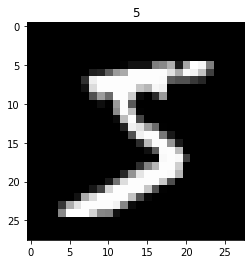

In [99]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

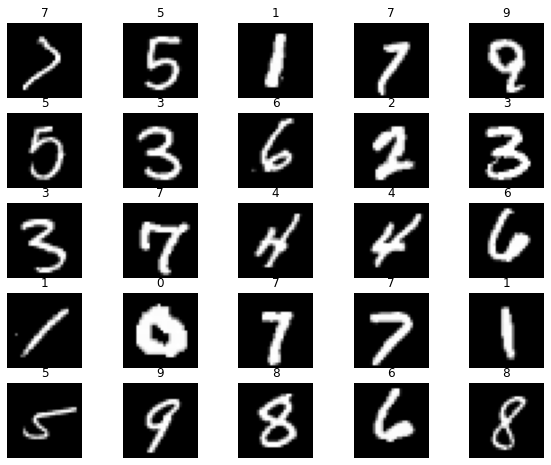

In [100]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [101]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data, batch_size=600, shuffle=True)
test_data_dataloader = DataLoader(test_data, batch_size=600, shuffle=True)

In [102]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=2,            
                kernel_size=5,              
                stride=1,                   
                padding=0,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(2, 3, 3, 1, 0),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(3 * 5 * 5, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

In [103]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 2, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(2, 2, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=50, out_features=10, bias=True)
)


In [104]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

In [105]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [106]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, train_dataloader):
    
    cnn.train()
        
    # Train the model
    total_step = len(train_dataloader)        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_dataloader):
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
    #             pass
    #     pass
    # pass
train(num_epochs, cnn, train_dataloader)

Epoch [1/10], Step [100/100], Loss: 0.2157
Epoch [2/10], Step [100/100], Loss: 0.1723
Epoch [3/10], Step [100/100], Loss: 0.1234
Epoch [4/10], Step [100/100], Loss: 0.1438
Epoch [5/10], Step [100/100], Loss: 0.1404
Epoch [6/10], Step [100/100], Loss: 0.1436
Epoch [7/10], Step [100/100], Loss: 0.1441
Epoch [8/10], Step [100/100], Loss: 0.1260
Epoch [9/10], Step [100/100], Loss: 0.1528
Epoch [10/10], Step [100/100], Loss: 0.1491


In [107]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(test_data_dataloader):
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
            print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)     
            pass
test()

Test Accuracy of the model on the 10000 test images: 0.95
Test Accuracy of the model on the 10000 test images: 0.96
Test Accuracy of the model on the 10000 test images: 0.96
Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.95
Test Accuracy of the model on the 10000 test images: 0.96
Test Accuracy of the model on the 10000 test images: 0.96
Test Accuracy of the model on the 10000 test images: 0.96
Test Accuracy of the model on the 10000 test images: 0.95
Test Accuracy of the model on the 10000 test images: 0.96
Test Accuracy of the model on the 10000 test images: 0.96
Test Accuracy of the model on the 10000 test images: 0.95
Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.98
Test Accuracy of the model on the 10000 test images: 0.96
Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.97


In [108]:
sample = next(iter(test_data_dataloader))
imgs, lbls = sample

In [109]:
actual_number = lbls[:1].numpy()
actual_number

array([0], dtype=int64)

In [110]:
test_output, last_layer = cnn(imgs[:1])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: 0
Actual number: [0]


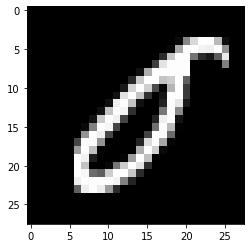

In [111]:
img = imgs[:1]
plt.imshow(img.squeeze(), cmap="gray")

In [112]:
torch.save(cnn.state_dict(), "./simplecnn")

In [113]:
model = CNN()
model.load_state_dict(torch.load("./simplecnn"))
model.eval()

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 2, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(2, 2, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=50, out_features=10, bias=True)
)

In [114]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in cnn.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Parameters")
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, "\n", param.data)

Model's state_dict:
conv1.0.weight 	 torch.Size([2, 1, 5, 5])
conv1.0.bias 	 torch.Size([2])
conv2.0.weight 	 torch.Size([2, 2, 3, 3])
conv2.0.bias 	 torch.Size([2])
out.weight 	 torch.Size([10, 50])
out.bias 	 torch.Size([10])
Parameters
conv1.0.weight 
 tensor([[[[ 0.6041,  0.4377,  0.2980,  0.2466,  0.1707],
          [ 0.3095,  0.5343,  0.3851,  0.2176,  0.3249],
          [-0.2727,  0.0838,  0.2054,  0.3722,  0.4965],
          [-0.5755, -0.3354, -0.3696, -0.1190,  0.2632],
          [-0.3763, -0.4481, -0.2809, -0.4698, -0.2952]]],


        [[[ 0.0297,  0.1795,  0.3672,  0.3636,  0.3932],
          [ 0.0468, -0.0429,  0.0802,  0.1654,  0.5843],
          [-0.2623,  0.0510, -0.3346,  0.3138,  0.6929],
          [-0.4110, -0.3916, -0.1415,  0.3910,  0.4452],
          [-0.4159, -0.2252,  0.2406,  0.3140,  0.3398]]]])
conv1.0.bias 
 tensor([-0.1481, -0.3137])
conv2.0.weight 
 tensor([[[[ 0.4399,  0.3545,  0.0230],
          [ 0.5293,  0.3528,  0.3751],
          [ 0.0710,  0.2407,  